## HW08 
### Inception/BatchNorm/Callbacks/SeparableConv¶


In [22]:
import os
import shutil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras import losses

### Graph Visualization

In [2]:
def plot(history):
    plt.figure(figsize = (10,5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label = 'Training loss')
    plt.plot(history['val_loss'], label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history['acc'], label = 'Training accuracy')
    plt.plot(history['val_acc'], label = 'Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()
    
    print('Maximum Training Accuracy:',max(history['acc']), 'Maximum Validation Accuracy', max(history['val_acc']))

### Data Pre-processing 

In [20]:
train_dir = '/home/labina/Lectures/AdvanceDeepLearning/datasets/cats_and_dogs_small/train'
test_dir = '/home/labina/Lectures/AdvanceDeepLearning/datasets/cats_and_dogs_small/test'
val_dir = '/home/labina/Lectures/AdvanceDeepLearning/datasets/cats_and_dogs_small/validation'

print("for Xception")
###Data Agumentation  for Xception###
train_datagen = ImageDataGenerator(
    #rescale=1./255,
    preprocessing_function=keras.applications.xception.preprocess_input,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(preprocessing_function=keras.applications.xception.preprocess_input)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

test_generator= test_datagen.flow_from_directory(
    test_dir, 
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

print("for Inception")
###Data Agumentation  for Iception###
train_I = ImageDataGenerator(
    #rescale=1./255,
    preprocessing_function=keras.applications.inception_v3.preprocess_input,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Note that the validation data should not be augmented!
test_I = ImageDataGenerator(preprocessing_function=keras.applications.inception_v3.preprocess_input)

trainX = train_I.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

testX= test_I.flow_from_directory(
    test_dir, 
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary')

validationX = test_I.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

for seperavleConv
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
for Xception
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
for Inception
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Test 01: Seperable Convolution Model 
### Test Accuracy : 50.10%

In [112]:
###Data Agumentation  for Iception###
train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Note that the validation data should not be augmented!
test = ImageDataGenerator(rescale = 1./255)

trainY = train.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

testY= test.flow_from_directory(
    test_dir, 
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary')

validationY = test.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

class SepModel(keras.models.Model):
    def __init__(self):
        super(SepModel,self).__init__()
        self.layer1=layers.SeparableConv2D(32, 3, 
                                     activation='relu', 
                                          )
        self.layer2=layers.SeparableConv2D(64, 3, activation='relu')
        self.layer3=layers.MaxPooling2D(2)

        self.layer4=layers.SeparableConv2D(64, 3, activation='relu')
        self.layer5=layers.SeparableConv2D(128, 3, activation='relu')
        self.layer6=layers.MaxPooling2D(2)
        self.flat=keras.layers.Flatten()
        self.layer7=layers.Dense(32, activation='relu')
        self.layer8=layers.Dense(2, activation='softmax')
    def call(self,inputs):
        output=self.layer1(inputs)
        output=self.layer2(output)
        output=self.layer3(output)
        output=self.layer4(output)
        output=self.layer5(output)
        output=self.layer6(output)
        #print(output)
        output=self.flat(output)
        output=self.layer7(output)
        output=self.layer8(output)
       #print(output)
        return output

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [113]:
seqModel=SepModel()
inp=keras.Input(shape=(150,150,3))
output=seqModel(inp)
model=keras.Model(inp,output)
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-3),metrics=['acc'])
model.summary()
history = model.fit_generator(
      trainY,
      steps_per_epoch= 2000//32,
      epochs=30,
      validation_data=validationY,
      validation_steps= 1000//32)

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_45 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
sep_model_16 (SepModel)      (None, 2)                 4751261   
Total params: 4,751,261
Trainable params: 4,751,261
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
62/62 [==============================] - 45s 726ms/step - loss: 0.6932 - acc: 0.5040 - val_loss: 0.6931 - val_acc: 0.4990
Epoch 2/30
62/62 [==============================] - 43s 699ms/step - loss: 0.6931 - acc: 0.4975 - val_loss: 0.6931 - val_acc: 0.5020
Epoch 3/30
62/62 [==============================] - 43s 700ms/step - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5020
Epoch 4/30
62/62 [==============================] - 43s 698ms/step - loss: 0.6931 - acc: 0.5036 - val_loss: 0.69

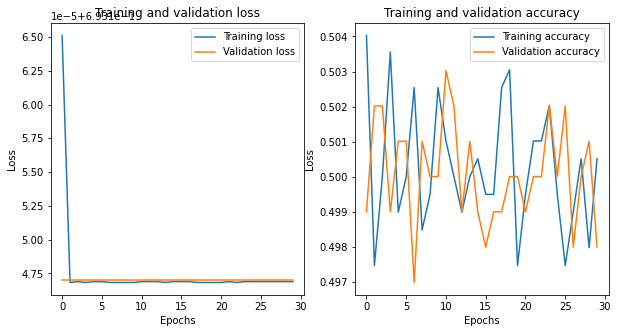

Maximum Training Accuracy: 0.5040322542190552 Maximum Validation Accuracy 0.5030242204666138
test acc 0.5010080933570862


In [114]:
plot(history.history)
test_loss,test_acc = model.evaluate_generator(testY,steps=1000//32)
print('test acc', test_acc)

### Test 02: Fine Tuninning with Xception 
### Test accuracy: 97.10% {Best}

Epoch 1/30
62/62 [==============================] - 52s 846ms/step - loss: 0.5685 - acc: 0.8374 - val_loss: 0.0854 - val_acc: 0.9627
Epoch 2/30
62/62 [==============================] - 52s 837ms/step - loss: 0.2893 - acc: 0.8857 - val_loss: 0.0649 - val_acc: 0.9748
Epoch 3/30
62/62 [==============================] - 52s 839ms/step - loss: 0.2786 - acc: 0.8872 - val_loss: 0.1113 - val_acc: 0.9466
Epoch 4/30
62/62 [==============================] - 52s 839ms/step - loss: 0.2806 - acc: 0.8968 - val_loss: 0.1043 - val_acc: 0.9577
Epoch 5/30
62/62 [==============================] - 52s 840ms/step - loss: 0.2254 - acc: 0.9146 - val_loss: 0.0955 - val_acc: 0.9677
Epoch 6/30
62/62 [==============================] - 52s 842ms/step - loss: 0.2516 - acc: 0.9060 - val_loss: 0.1009 - val_acc: 0.9688
Epoch 7/30
62/62 [==============================] - 52s 836ms/step - loss: 0.2488 - acc: 0.9004 - val_loss: 0.1042 - val_acc: 0.9627
Epoch 8/30
62/62 [==============================] - 52s 838ms/step - 

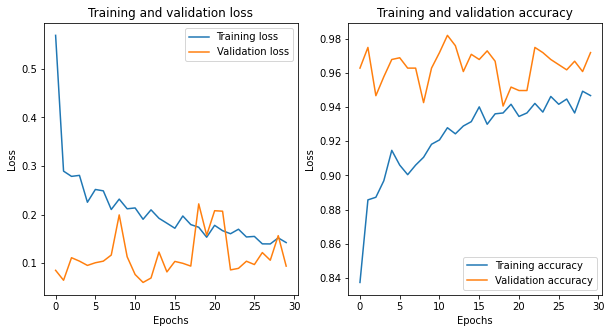

Maximum Training Accuracy: 0.9491869807243347 Maximum Validation Accuracy 0.9818548560142517
test acc 0.9710000157356262


In [104]:
base_model = tf.keras.applications.Xception(
    weights = "imagenet",
    input_shape =(150,150,3),
    include_top = False,
)
#freezing the base model
base_model.trainable = False

model = models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=2000//32,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=1000//32)
model.save("cats_and_dogs_xception.h5")
plot(history.history)
test_loss,test_acc = model.evaluate_generator(test_generator,steps=50)
print('test acc', test_acc)

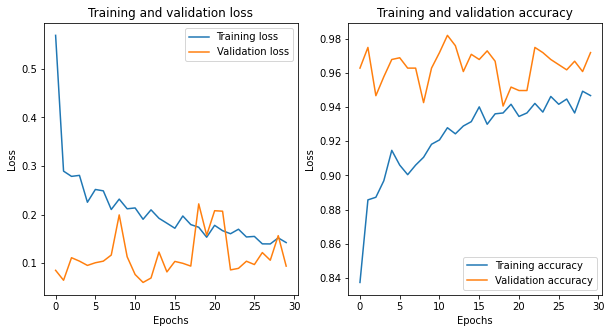

Maximum Training Accuracy: 0.9491869807243347 Maximum Validation Accuracy 0.9818548560142517
test acc 0.9710000157356262


In [105]:
model.save("cats_and_dogs_xception.h5")
plot(history.history)
test_loss,test_acc = model.evaluate_generator(test_generator,steps=32)
print('test acc', test_acc)

### Test 02: Base Model Xception base model trainable = True
### Test accuracy: 96.79%

Epoch 1/30
62/62 [==============================] - 181s 3s/step - loss: 0.4993 - acc: 0.7886 - val_loss: 0.1086 - val_acc: 0.9738
Epoch 2/30
62/62 [==============================] - 178s 3s/step - loss: 0.2604 - acc: 0.8968 - val_loss: 0.1769 - val_acc: 0.9677
Epoch 3/30
62/62 [==============================] - 178s 3s/step - loss: 0.1912 - acc: 0.9268 - val_loss: 0.2546 - val_acc: 0.9587
Epoch 4/30
62/62 [==============================] - 178s 3s/step - loss: 0.1725 - acc: 0.9390 - val_loss: 0.2485 - val_acc: 0.9738
Epoch 5/30
62/62 [==============================] - 177s 3s/step - loss: 0.1369 - acc: 0.9543 - val_loss: 0.3602 - val_acc: 0.9617
Epoch 6/30
62/62 [==============================] - 177s 3s/step - loss: 0.1535 - acc: 0.9487 - val_loss: 0.2946 - val_acc: 0.9657
Epoch 7/30
62/62 [==============================] - 177s 3s/step - loss: 0.0931 - acc: 0.9649 - val_loss: 0.2950 - val_acc: 0.9698
Epoch 8/30
62/62 [==============================] - 177s 3s/step - loss: 0.1120 - a

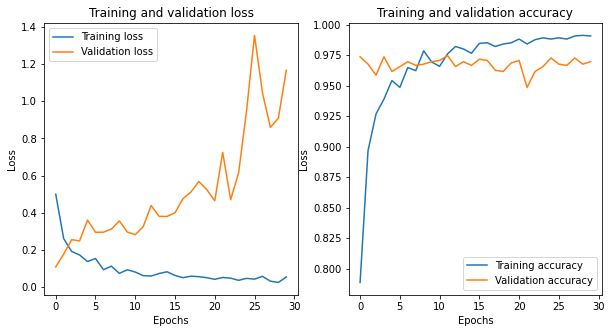

Maximum Training Accuracy: 0.9913617968559265 Maximum Validation Accuracy 0.9747983813285828
test acc 0.9679999947547913


In [18]:
base_model = tf.keras.applications.Xception(
    weights = "imagenet",
    input_shape =(150,150,3),
    include_top = False,
)
#freezing the base model
base_model.trainable = True

model = models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=2000//32,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=1000//32)

model.save("cats_and_dogs_xception_T.h5")
plot(history.history)
test_loss,test_acc = model.evaluate_generator(test_generator,steps=32)
print('test acc', test_acc)

### Test 03: Base Model Inception V3 base model trainable = False
#### Test accuracy : 95.99%

Epoch 1/30
62/62 [==============================] - 28s 455ms/step - loss: 0.8923 - acc: 0.8018 - val_loss: 0.3676 - val_acc: 0.8760
Epoch 2/30
62/62 [==============================] - 24s 389ms/step - loss: 0.3916 - acc: 0.8465 - val_loss: 0.0947 - val_acc: 0.9667
Epoch 3/30
62/62 [==============================] - 24s 389ms/step - loss: 0.3217 - acc: 0.8669 - val_loss: 0.1868 - val_acc: 0.9163
Epoch 4/30
62/62 [==============================] - 24s 391ms/step - loss: 0.3285 - acc: 0.8705 - val_loss: 0.2702 - val_acc: 0.9214
Epoch 5/30
62/62 [==============================] - 24s 391ms/step - loss: 0.3129 - acc: 0.8755 - val_loss: 0.1363 - val_acc: 0.9526
Epoch 6/30
62/62 [==============================] - 24s 389ms/step - loss: 0.3102 - acc: 0.8740 - val_loss: 0.0847 - val_acc: 0.9657
Epoch 7/30
62/62 [==============================] - 24s 389ms/step - loss: 0.2704 - acc: 0.8984 - val_loss: 0.1021 - val_acc: 0.9647
Epoch 8/30
62/62 [==============================] - 24s 390ms/step - 

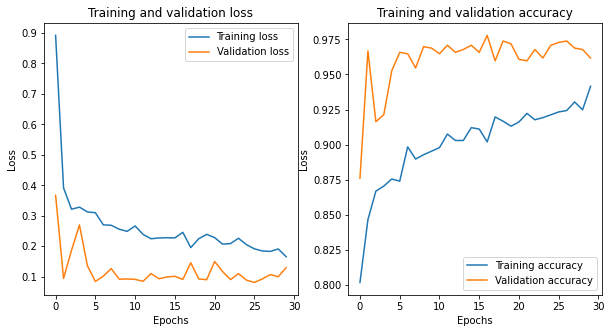

Maximum Training Accuracy: 0.9415650367736816 Maximum Validation Accuracy 0.9778226017951965
test acc 0.9599999785423279


In [106]:
base_model = tf.keras.applications.InceptionV3(
    weights = "imagenet",
    input_shape =(150,150,3),
    include_top = False,
)
#freezing the base model
base_model.trainable = False

model = models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      trainX,
      steps_per_epoch=2000//32,
      epochs=30,
      validation_data=validationX,
      validation_steps=1000//32)

model.save("cats_and_dogs_inception.h5")
plot(history.history)
test_loss,test_acc = model.evaluate_generator(testX,steps=32)
print('test acc', test_acc)

### Test 04: Base Model Inception V3 base model trainable = True
#### Test accuracy : 94.30

Epoch 1/30
62/62 [==============================] - 92s 1s/step - loss: 0.5859 - acc: 0.7530 - val_loss: 1.2604 - val_acc: 0.8175
Epoch 2/30
62/62 [==============================] - 91s 1s/step - loss: 0.3294 - acc: 0.8613 - val_loss: 0.3262 - val_acc: 0.9204
Epoch 3/30
62/62 [==============================] - 90s 1s/step - loss: 0.2774 - acc: 0.8841 - val_loss: 0.8927 - val_acc: 0.9264
Epoch 4/30
62/62 [==============================] - 90s 1s/step - loss: 0.2182 - acc: 0.9111 - val_loss: 0.6304 - val_acc: 0.9516
Epoch 5/30
62/62 [==============================] - 90s 1s/step - loss: 0.1934 - acc: 0.9284 - val_loss: 2.9445 - val_acc: 0.9143
Epoch 6/30
62/62 [==============================] - 90s 1s/step - loss: 0.1735 - acc: 0.9390 - val_loss: 5.9448 - val_acc: 0.8911
Epoch 7/30
62/62 [==============================] - 90s 1s/step - loss: 0.1562 - acc: 0.9400 - val_loss: 2.6757 - val_acc: 0.9234
Epoch 8/30
62/62 [==============================] - 90s 1s/step - loss: 0.1859 - acc: 0.94

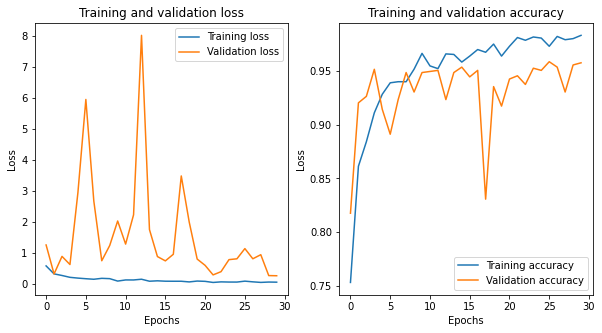

Maximum Training Accuracy: 0.9832317233085632 Maximum Validation Accuracy 0.9586693644523621
test acc 0.9430000185966492


In [107]:
base_model = tf.keras.applications.InceptionV3(
    weights = "imagenet",
    input_shape =(150,150,3),
    include_top = False,
)
#freezing the base model
base_model.trainable = True

model = models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      trainX,
      steps_per_epoch=2000//32,
      epochs=30,
      validation_data=validationX,
      validation_steps=1000//32)

model.save("cats_and_dogs_inception_T.h5")
plot(history.history)
test_loss,test_acc = model.evaluate_generator(testX,steps=32)
print('test acc', test_acc)

In [108]:
base_model = tf.keras.applications.InceptionV3(
    weights = "imagenet",
    input_shape =(150,150,3),
    include_top = False,
)
#freezing the base model
base_model.trainable = False
def get_model():
    model = models.Sequential()
    model.add(base_model)
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(lr=1e-4),
                  metrics=['acc'])
    return model

#### "Choose the model from "TEST 03" as it has good accuracy and it's not overfitting much "
### Test 05:  Using Keras CallBack Early Stopping/ Accuracy is 96.57% [Without Dropout layer]

In [78]:
import numpy as np 
class EarlyStoppingAtMinLoss(keras.callbacks.Callback):
    """Stop training when the loss is at its min, i.e. the loss stops decreasing.

  Arguments:
      patience: Number of epochs to wait after min has been hit. After this
      number of no improvement, training stops.
  """

    def __init__(self, patience=2):
        super(EarlyStoppingAtMinLoss, self).__init__()
        self.patience = patience
        # best_weights to store the weights at which the minimum loss occurs.
        self.best_weights = None

    def on_train_begin(self, logs=None):
        # The number of epoch it has waited when loss is no longer minimum.
        self.wait = 0
        # The epoch the training stops at.
        self.stopped_epoch = 0
        # Initialize the best as infinity.
        self.best = np.Inf

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get("loss")
        if np.less(current, self.best):
            self.best = current
            self.wait = 0
            # Record the best weights if current results is better (less).
            self.best_weights = self.model.get_weights()
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True
                print("Restoring model weights from the end of the best epoch.")
                self.model.set_weights(self.best_weights)

    def on_train_end(self, logs=None):
        if self.stopped_epoch > 0:
            print("Epoch %05d: early stopping" % (self.stopped_epoch + 1))


model = get_model()

history = model.fit_generator(
      trainX,
      steps_per_epoch=2000//32,
      epochs=30,
      validation_data=validationX,
      validation_steps=1000//32,
      callbacks = [EarlyStoppingAtMinLoss()])


Epoch 1/30
62/62 [==============================] - 25s 402ms/step - loss: 0.9821 - acc: 0.8059 - val_loss: 0.1882 - val_acc: 0.9284
Epoch 2/30
62/62 [==============================] - 25s 399ms/step - loss: 0.3424 - acc: 0.8674 - val_loss: 0.1327 - val_acc: 0.9516
Epoch 3/30
62/62 [==============================] - 24s 392ms/step - loss: 0.3297 - acc: 0.8648 - val_loss: 0.1361 - val_acc: 0.9577
Epoch 4/30
62/62 [==============================] - 24s 392ms/step - loss: 0.3067 - acc: 0.8694 - val_loss: 0.1563 - val_acc: 0.9486
Epoch 5/30
62/62 [==============================] - 24s 390ms/step - loss: 0.3294 - acc: 0.8689 - val_loss: 0.1009 - val_acc: 0.9708
Epoch 6/30
62/62 [==============================] - 24s 391ms/step - loss: 0.2977 - acc: 0.8775 - val_loss: 0.1961 - val_acc: 0.9194
Epoch 7/30
62/62 [==============================] - 24s 390ms/step - loss: 0.2957 - acc: 0.8791 - val_loss: 0.0940 - val_acc: 0.9728
Epoch 8/30
62/62 [==============================] - 24s 391ms/step - 

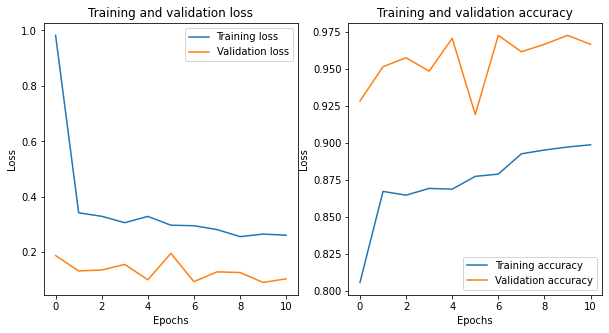

Maximum Training Accuracy: 0.8988820910453796 Maximum Validation Accuracy 0.9727822542190552
31/31 [==============================] - 7s 222ms/step - loss: 0.1006 - acc: 0.9657


In [81]:
plot(history.history)
test_loss, test_acc = model.evaluate(testX,steps = 1000//32)

### Test 06-  Using Keras callback Early Stopping model with single dropout layer  of unit[ 0.2] between Flatten and dense 
#### Test accuracy: 96.77%
##### Epoch 00013: early stopping

In [82]:
base_model = tf.keras.applications.InceptionV3(
    weights = "imagenet",
    input_shape =(150,150,3),
    include_top = False,
)
#freezing the base model
base_model.trainable = False
def get_model():
    model = models.Sequential()
    model.add(base_model)
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(lr=1e-4),
                  metrics=['acc'])
    return model

model = get_model()

history = model.fit_generator(
      trainX,
      steps_per_epoch=2000//32,
      epochs=30,
      validation_data=validationX,
      validation_steps=1000//32,
      callbacks = [EarlyStoppingAtMinLoss()])

Epoch 1/30
62/62 [==============================] - 26s 413ms/step - loss: 0.9126 - acc: 0.7896 - val_loss: 0.1693 - val_acc: 0.9304
Epoch 2/30
62/62 [==============================] - 25s 397ms/step - loss: 0.3492 - acc: 0.8501 - val_loss: 0.1171 - val_acc: 0.9597
Epoch 3/30
62/62 [==============================] - 24s 392ms/step - loss: 0.2815 - acc: 0.8806 - val_loss: 0.1337 - val_acc: 0.9607
Epoch 4/30
62/62 [==============================] - 24s 391ms/step - loss: 0.2936 - acc: 0.8847 - val_loss: 0.1284 - val_acc: 0.9496
Epoch 5/30
62/62 [==============================] - 24s 391ms/step - loss: 0.2738 - acc: 0.8882 - val_loss: 0.1095 - val_acc: 0.9617
Epoch 6/30
62/62 [==============================] - 24s 389ms/step - loss: 0.2796 - acc: 0.8821 - val_loss: 0.0961 - val_acc: 0.9637
Epoch 7/30
62/62 [==============================] - 24s 391ms/step - loss: 0.2682 - acc: 0.8938 - val_loss: 0.0960 - val_acc: 0.9698
Epoch 8/30
62/62 [==============================] - 24s 392ms/step - 

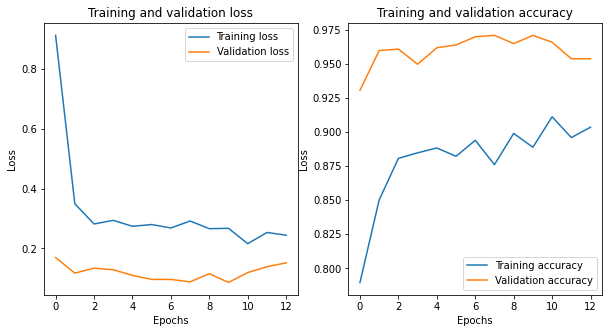

Maximum Training Accuracy: 0.9110772609710693 Maximum Validation Accuracy 0.9707661271095276
31/31 [==============================] - 7s 228ms/step - loss: 0.0986 - acc: 0.9677


In [83]:
plot(history.history)
test_loss, test_acc = model.evaluate(testX,steps = 1000//32)

### Test 07- Adding dense layer [512] and next droupout of [0.2] in between dense layers
#### Test accuracy 97.08% [Best Accuracy]

In [84]:
base_model = tf.keras.applications.InceptionV3(
    weights = "imagenet",
    input_shape =(150,150,3),
    include_top = False,
)
#freezing the base model
base_model.trainable = False
def get_model():
    model = models.Sequential()
    model.add(base_model)
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(512, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(lr=1e-4),
                  metrics=['acc'])
    return model

model = get_model()

history = model.fit_generator(
      trainX,
      steps_per_epoch=2000//32,
      epochs=30,
      validation_data=validationX,
      validation_steps=1000//32,
      callbacks = [EarlyStoppingAtMinLoss()])

Epoch 1/30
62/62 [==============================] - 27s 429ms/step - loss: 0.8578 - acc: 0.7622 - val_loss: 0.1112 - val_acc: 0.9627
Epoch 2/30
62/62 [==============================] - 26s 415ms/step - loss: 0.4151 - acc: 0.8486 - val_loss: 0.1637 - val_acc: 0.9385
Epoch 3/30
62/62 [==============================] - 26s 415ms/step - loss: 0.3854 - acc: 0.8547 - val_loss: 0.1130 - val_acc: 0.9567
Epoch 4/30
62/62 [==============================] - 25s 406ms/step - loss: 0.3489 - acc: 0.8684 - val_loss: 0.3060 - val_acc: 0.8982
Epoch 5/30
62/62 [==============================] - 25s 404ms/step - loss: 0.3778 - acc: 0.8521 - val_loss: 0.1023 - val_acc: 0.9698
Epoch 6/30
62/62 [==============================] - 25s 405ms/step - loss: 0.3234 - acc: 0.8709 - val_loss: 0.2559 - val_acc: 0.9022
Epoch 7/30
62/62 [==============================] - 26s 413ms/step - loss: 0.2948 - acc: 0.8918 - val_loss: 0.1147 - val_acc: 0.9657
Epoch 8/30
62/62 [==============================] - 25s 406ms/step - 

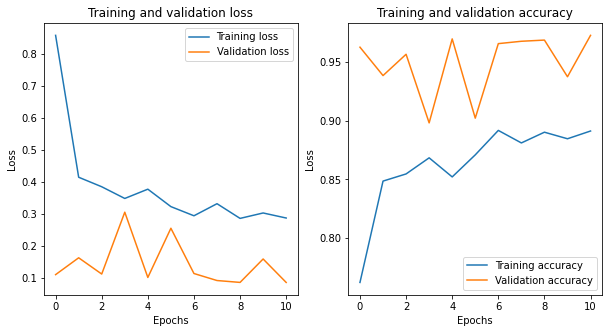

Maximum Training Accuracy: 0.8917682766914368 Maximum Validation Accuracy 0.9727822542190552
31/31 [==============================] - 7s 224ms/step - loss: 0.0828 - acc: 0.9708


In [85]:
plot(history.history)
test_loss, test_acc = model.evaluate(testX,steps = 1000//32)

### Test 08- Chagning lr to 0.001
#### Test accuracy 96.47%

In [86]:
base_model = tf.keras.applications.InceptionV3(
    weights = "imagenet",
    input_shape =(150,150,3),
    include_top = False,
)
#freezing the base model
base_model.trainable = False
def get_model():
    model = models.Sequential()
    model.add(base_model)
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(512, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(lr=1e-3),
                  metrics=['acc'])
    return model

model = get_model()

history = model.fit_generator(
      trainX,
      steps_per_epoch=2000//32,
      epochs=30,
      validation_data=validationX,
      validation_steps=1000//32,
      callbacks = [EarlyStoppingAtMinLoss()])

Epoch 1/30
62/62 [==============================] - 26s 424ms/step - loss: 11.3669 - acc: 0.7287 - val_loss: 0.3135 - val_acc: 0.9284
Epoch 2/30
62/62 [==============================] - 26s 412ms/step - loss: 0.6819 - acc: 0.8196 - val_loss: 0.4336 - val_acc: 0.8397
Epoch 3/30
62/62 [==============================] - 25s 406ms/step - loss: 0.6640 - acc: 0.8135 - val_loss: 0.1872 - val_acc: 0.9153
Epoch 4/30
62/62 [==============================] - 25s 408ms/step - loss: 0.4603 - acc: 0.8399 - val_loss: 0.3322 - val_acc: 0.9022
Epoch 5/30
62/62 [==============================] - 25s 406ms/step - loss: 0.3816 - acc: 0.8516 - val_loss: 0.1257 - val_acc: 0.9556
Epoch 6/30
62/62 [==============================] - 25s 406ms/step - loss: 0.3625 - acc: 0.8587 - val_loss: 0.2262 - val_acc: 0.9315
Epoch 7/30
62/62 [==============================] - 25s 405ms/step - loss: 0.3504 - acc: 0.8679 - val_loss: 0.1347 - val_acc: 0.9647
Epoch 8/30
62/62 [==============================] - 25s 404ms/step -

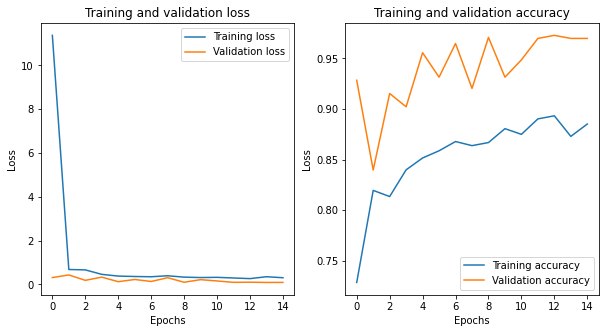

Maximum Training Accuracy: 0.8932926654815674 Maximum Validation Accuracy 0.9727822542190552
31/31 [==============================] - 7s 227ms/step - loss: 0.0895 - acc: 0.9647


In [87]:
plot(history.history)
test_loss, test_acc = model.evaluate(testX,steps = 1000//32)

### Test 09:Using keras Callback  Learning rate scheduling 
#### Test accuracy : 49.80%

In [94]:
base_model = tf.keras.applications.InceptionV3(
    weights = "imagenet",
    input_shape =(150,150,3),
    include_top = False,
)
#freezing the base model
base_model.trainable = False
def get_model():
    model = models.Sequential()
    model.add(base_model)
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(512, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(lr = 0.1),
                  metrics=['acc'])
    return model 

class CustomLearningRateScheduler(keras.callbacks.Callback):
    """Learning rate scheduler which sets the learning rate according to schedule.

  Arguments:
      schedule: a function that takes an epoch index
          (integer, indexed from 0) and current learning rate
          as inputs and returns a new learning rate as output (float).
  """

    def __init__(self, schedule):
        super(CustomLearningRateScheduler, self).__init__()
        self.schedule = schedule

    def on_epoch_begin(self, epoch, logs=None):
        if not hasattr(self.model.optimizer, "lr"):
            raise ValueError('Optimizer must have a "lr" attribute.')
        # Get the current learning rate from model's optimizer.
        lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
        # Call schedule function to get the scheduled learning rate.
        scheduled_lr = self.schedule(epoch, lr)
        # Set the value back to the optimizer before this epoch starts
        tf.keras.backend.set_value(self.model.optimizer.lr, scheduled_lr)
        print("\nEpoch %05d: Learning rate is %6.4f." % (epoch, scheduled_lr))


LR_SCHEDULE = [
    # (epoch to start, learning rate) tuples
    (3, 1e-2),
    (6, 1e-3),
    (9, 1e-4),
    ]


def lr_schedule(epoch, lr):
    """Helper function to retrieve the scheduled learning rate based on epoch."""
    if epoch < LR_SCHEDULE[0][0] or epoch > LR_SCHEDULE[-1][0]:
        return lr
    for i in range(len(LR_SCHEDULE)):
        if epoch == LR_SCHEDULE[i][0]:
            return LR_SCHEDULE[i][1]
    return lr


model = get_model()
history = model.fit(
    trainX,
    batch_size=32,
    steps_per_epoch=2000//32,
    epochs=12,
    verbose=1,
    validation_data= validationX,
    callbacks=[
        CustomLearningRateScheduler(lr_schedule),
    ],
)



Epoch 00000: Learning rate is 0.1000.
Epoch 1/12
62/62 [==============================] - 27s 429ms/step - loss: 132082.8438 - acc: 0.5010 - val_loss: 0.6965 - val_acc: 0.5000

Epoch 00001: Learning rate is 0.1000.
Epoch 2/12
62/62 [==============================] - 26s 422ms/step - loss: 15.0303 - acc: 0.4853 - val_loss: 0.6980 - val_acc: 0.5000

Epoch 00002: Learning rate is 0.1000.
Epoch 3/12
62/62 [==============================] - 25s 408ms/step - loss: 5.7902 - acc: 0.5046 - val_loss: 0.6962 - val_acc: 0.5000

Epoch 00003: Learning rate is 0.0100.
Epoch 4/12
62/62 [==============================] - 26s 422ms/step - loss: 2.0757 - acc: 0.5010 - val_loss: 0.6932 - val_acc: 0.5000

Epoch 00004: Learning rate is 0.0100.
Epoch 5/12
62/62 [==============================] - 26s 418ms/step - loss: 1.2081 - acc: 0.4700 - val_loss: 0.6931 - val_acc: 0.5000

Epoch 00005: Learning rate is 0.0100.
Epoch 6/12
62/62 [==============================] - 26s 420ms/step - loss: 2.9556 - acc: 0.4609

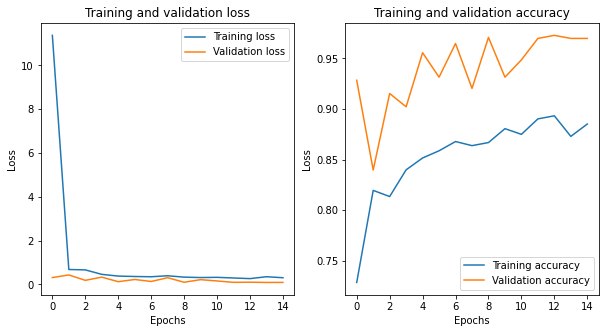

Maximum Training Accuracy: 0.8932926654815674 Maximum Validation Accuracy 0.9727822542190552
31/31 [==============================] - 7s 225ms/step - loss: 0.6931 - acc: 0.4980


In [95]:
plot(history.history)
test_loss, test_acc = model.evaluate(testX,steps = 1000//32)

#### Test 10: Using Learning rate Schedule Starting from 0.0001
#### Test Accuracy = 92.64

In [99]:
base_model = tf.keras.applications.InceptionV3(
    weights = "imagenet",
    input_shape =(150,150,3),
    include_top = False,
)
#freezing the base model
base_model.trainable = False
def get_model():
    model = models.Sequential()
    model.add(base_model)
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(512, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(lr = 0.0001),
                  metrics=['acc'])
    return model 

class CustomLearningRateScheduler(keras.callbacks.Callback):
    """Learning rate scheduler which sets the learning rate according to schedule.

  Arguments:
      schedule: a function that takes an epoch index
          (integer, indexed from 0) and current learning rate
          as inputs and returns a new learning rate as output (float).
  """

    def __init__(self, schedule):
        super(CustomLearningRateScheduler, self).__init__()
        self.schedule = schedule

    def on_epoch_begin(self, epoch, logs=None):
        if not hasattr(self.model.optimizer, "lr"):
            raise ValueError('Optimizer must have a "lr" attribute.')
        # Get the current learning rate from model's optimizer.
        lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
        # Call schedule function to get the scheduled learning rate.
        scheduled_lr = self.schedule(epoch, lr)
        # Set the value back to the optimizer before this epoch starts
        tf.keras.backend.set_value(self.model.optimizer.lr, scheduled_lr)
        print("\nEpoch %05d: Learning rate is %6.4f." % (epoch, scheduled_lr))


LR_SCHEDULE = [
    # (epoch to start, learning rate) tuples
    (9, 1e-5),
    ]


def lr_schedule(epoch, lr):
    """Helper function to retrieve the scheduled learning rate based on epoch."""
    if epoch < LR_SCHEDULE[0][0] or epoch > LR_SCHEDULE[-1][0]:
        return lr
    for i in range(len(LR_SCHEDULE)):
        if epoch == LR_SCHEDULE[i][0]:
            return LR_SCHEDULE[i][1]
    return lr


model = get_model()
history = model.fit(
    trainX,
    batch_size=32,
    steps_per_epoch=2000//32,
    epochs=12,
    verbose=1,
    validation_data= validationX,
    callbacks=[
        CustomLearningRateScheduler(lr_schedule),
    ],
)


Epoch 00000: Learning rate is 0.0001.
Epoch 1/12
62/62 [==============================] - 28s 445ms/step - loss: 0.8092 - acc: 0.7576 - val_loss: 0.3878 - val_acc: 0.8370

Epoch 00001: Learning rate is 0.0001.
Epoch 2/12
62/62 [==============================] - 26s 427ms/step - loss: 0.4301 - acc: 0.8410 - val_loss: 0.1125 - val_acc: 0.9600

Epoch 00002: Learning rate is 0.0001.
Epoch 3/12
62/62 [==============================] - 27s 437ms/step - loss: 0.3586 - acc: 0.8562 - val_loss: 0.2596 - val_acc: 0.8920

Epoch 00003: Learning rate is 0.0001.
Epoch 4/12
62/62 [==============================] - 26s 418ms/step - loss: 0.3437 - acc: 0.8811 - val_loss: 0.1048 - val_acc: 0.9700

Epoch 00004: Learning rate is 0.0001.
Epoch 5/12
62/62 [==============================] - 26s 412ms/step - loss: 0.3745 - acc: 0.8745 - val_loss: 0.0933 - val_acc: 0.9740

Epoch 00005: Learning rate is 0.0001.
Epoch 6/12
62/62 [==============================] - 26s 426ms/step - loss: 0.3266 - acc: 0.8836 - val

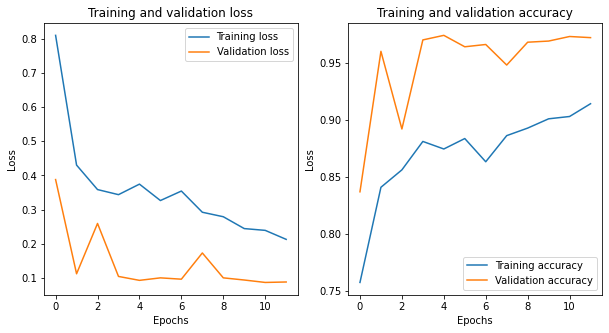

Maximum Training Accuracy: 0.9141260385513306 Maximum Validation Accuracy 0.9739999771118164
31/31 [==============================] - 8s 264ms/step - loss: 0.1803 - acc: 0.9264


In [100]:
plot(history.history)
train_loss, train_acc = model.evaluate(trainX, steps = 1000//32)

### Conclusion 
<ul>
<li> Fine tuning the model with pre-trained weights has better accuracy than seperable convolution </li>
<li> Test accuracy for Seperable convolution in 50.10% </li>
    <li> Test accuracy with Xception is 97.10%[best accuracy before using keras callback function]</li>
    <li> Test 07: Adding dense layer [512] and droupout of [0.2] in between dense layers and using Keras early stopping callback has best result in comparision to others <b> Test accuracy 97.08% [Best Accuracy] </b> <b> <i>lr = 0.0001</i> </b> </li>
    </ul>